In [1]:
# 라이브러리 설정
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import random

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Reshape

# 랜덤 시드 고정
SEED=2021
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

In [20]:
# 케라스에서 불러오기
from tensorflow.keras import datasets
fashion_mnist = datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()


# 피처 스케일링
X_train = X_train / 255.
X_test = X_test /255.


# 차원 추가
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)


print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(60000, 28, 28, 1) (60000,) (10000, 28, 28, 1) (10000,)


In [50]:
# 오토인코더 모델 정의
'''def Autoencoder():
    model = Sequential()
    
    # Encoder 
    model.add(Conv2D(filters=3, kernel_size=(5,5), 
                    activation='swish', input_shape=[28,28,1]))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    
    # Decoder
    model.add(Dense(units=28*28, activation='sigmoid'))
    model.add(Reshape((28,28)))
    
    # Compile
    model.compile(optimizer='adam', loss='mean_squared_error')
    
    return model

ae_model = Autoencoder()
ae_model.summary()'''

def Autoencoder():
  #model = Sequnetial()

  X = tf.keras.layers.Input(shape=[28,28,1])
  H = tf.keras.layers.Conv2D(3, kernel_size=5, activation='swish')(X)
  H = tf.keras.layers.MaxPool2D()(H)
  H = tf.keras.layers.Conv2D(6, kernel_size=5, activation='swish')(H)
  H = tf.keras.layers.MaxPool2D()(H)

  H = tf.keras.layers.Flatten()(H)
  H = tf.keras.layers.Dense(64,activation='swish')(H)
  H = tf.keras.layers.Dense(512,activation='swish')(H)
  Y = tf.keras.layers.Dense(28*28,activation='swish')(H)
  Y = Reshape((28,28,1))(Y)
    
  model = tf.keras.models.Model(X,Y)
  model.compile(optimizer='adam',loss='mean_squared_error')

  return model

ae_model = Autoencoder()
ae_model.summary()

Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_15 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 24, 24, 3)         78        
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 12, 12, 3)         0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 8, 8, 6)           456       
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 4, 4, 6)           0         
_________________________________________________________________
flatten_15 (Flatten)         (None, 96)                0         
_________________________________________________________________
dense_42 (Dense)             (None, 64)                6208

In [51]:
# 오토인코더 모델 학습
history = ae_model.fit(X_train, X_train, batch_size=64, epochs=20, verbose=0)

ae_images = ae_model.predict(X_test)
ae_images.shape

(10000, 28, 28, 1)

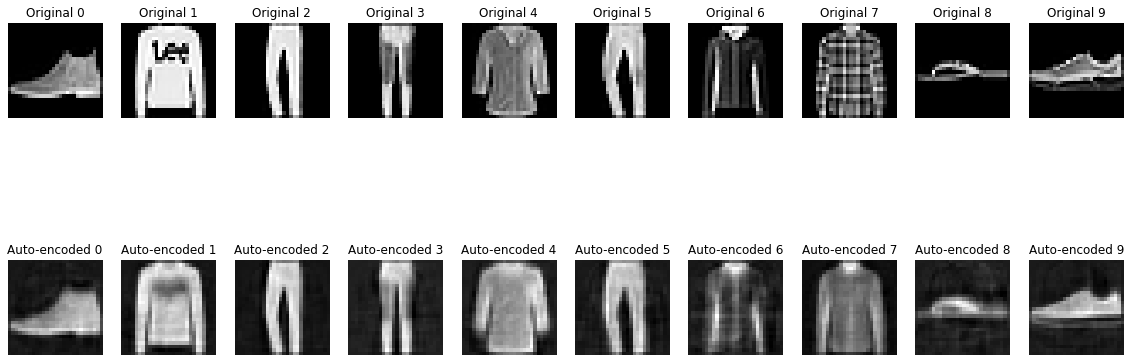

In [55]:
num = 10 
plt.figure(figsize=(20,8))

for i in range(10):
    # 원본 이미지
    ax = plt.subplot(2, num, i+1)
    plt.imshow(X_test[i].reshape((28,28)), cmap='gray')
    plt.title("Original %s" % str(i))
    plt.axis('off')
    
    # 복원 이미지
    ax = plt.subplot(2, num, i+num+1)
    plt.imshow(ae_images[i].reshape((28,28)), cmap='gray')
    plt.title("Auto-encoded %s" % str(i))
    plt.axis('off')
    
plt.show()